<a href="https://www.kaggle.com/code/nora114/weather-forecast?scriptVersionId=175583077" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Training model for Weather Forcast 🌥️

>   ### Installing required libraries and neuralprophet as its the model we'll be working with

In [1]:
!pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 34.5 MB/s eta 0:00:00
  Attempting uninstall: holidays
    Found existing installation: holidays 0.24
    Uninstalling holidays-0.24:
      Successfully uninstalled holidays-0.24
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 2.2.2
    Uninstalling pytorch-lightning-2.2.2:
      Successfully uninstalled pytorch-lightning-2.2.2


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [3]:
df = pd.read_csv('/kaggle/input/dataset/weather_dataset.csv', parse_dates=['date'])
df.tail()

,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max
153795,4,2024-03-15,25.0,11.2,18.0,16.2,2024-03-15T06:03,2024-03-15T18:02,0.0,13.7
153796,4,2024-03-16,23.3,12.0,17.5,15.9,2024-03-16T06:02,2024-03-16T18:02,0.0,15.5
153797,4,2024-03-17,23.6,14.6,18.1,16.0,2024-03-17T06:00,2024-03-17T18:03,1.4,26.3
153798,4,2024-03-18,15.1,14.8,NaN,NaN,2024-03-18T05:59,2024-03-18T18:04,NaN,17.2
153799,4,2024-03-19,NaN,NaN,NaN,NaN,2024-03-19T05:58,2024-03-19T18:04,NaN,NaN


In [4]:
df.location_id.unique()

array([0, 1, 2, 3, 4])

#### These respresents our 5 cities in Egypt: Cairo index[0], Alex[1],Aswan[2], Sharm[3], Zag[4].

In [5]:
df.dtypes

location_id                           int64
date                         datetime64[ns]
temperature_max                     float64
temperature_min                     float64
temperature_mean                    float64
apparent_temperature_mean           float64
sunrise                              object
sunset                               object
rain_sum                            float64
wind_speed_max                      float64
dtype: object

### Seperating the dataset by each city.

In [6]:
cairo_dataset =df[df['location_id']== 0]
cairo_dataset['date'] = pd.to_datetime(cairo_dataset['date'])
cairo_dataset.head()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_18/700432535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cairo_dataset['date'] = pd.to_datetime(cairo_dataset['date'])



,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max
0,0,1940-01-01,NaN,NaN,NaN,NaN,1940-01-01T06:50,1940-01-01T17:05,NaN,NaN
1,0,1940-01-02,16.0,5.4,10.3,6.9,1940-01-02T06:51,1940-01-02T17:06,0.0,12.8
2,0,1940-01-03,15.6,5.3,9.9,5.5,1940-01-03T06:51,1940-01-03T17:07,0.0,22.2
3,0,1940-01-04,15.6,7.5,11.5,8.5,1940-01-04T06:51,1940-01-04T17:07,0.0,14.7
4,0,1940-01-05,16.4,7.6,11.6,9.3,1940-01-05T06:51,1940-01-05T17:08,0.0,9.4


In [7]:
alex_dataset =df[df['location_id']== 1]
alex_dataset['date'] = pd.to_datetime(alex_dataset['date'])
alex_dataset.head()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_18/544484074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alex_dataset['date'] = pd.to_datetime(alex_dataset['date'])



,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max
30760,1,1940-01-01,NaN,NaN,NaN,NaN,1940-01-01T06:58,1940-01-01T17:08,NaN,NaN
30761,1,1940-01-02,16.2,10.4,13.3,9.4,1940-01-02T06:59,1940-01-02T17:09,0.0,20.6
30762,1,1940-01-03,13.9,8.5,11.2,6.4,1940-01-03T06:59,1940-01-03T17:09,0.3,24.7
30763,1,1940-01-04,15.5,11.5,13.7,10.8,1940-01-04T06:59,1940-01-04T17:10,0.6,19.7
30764,1,1940-01-05,16.1,9.8,12.5,10.3,1940-01-05T06:59,1940-01-05T17:11,0.0,13.1


In [8]:
aswan_dataset =df[df['location_id']== 2]
aswan_dataset['date'] = pd.to_datetime(aswan_dataset['date'])
aswan_dataset.head()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_18/1989777685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aswan_dataset['date'] = pd.to_datetime(aswan_dataset['date'])



,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max
61520,2,1940-01-01,NaN,NaN,NaN,NaN,1940-01-01T06:31,1940-01-01T17:11,NaN,NaN
61521,2,1940-01-02,21.3,9.9,14.9,10.5,1940-01-02T06:31,1940-01-02T17:12,0.0,19.1
61522,2,1940-01-03,19.9,6.5,13.4,10.1,1940-01-03T06:32,1940-01-03T17:13,0.0,9.9
61523,2,1940-01-04,19.1,6.9,12.9,8.8,1940-01-04T06:32,1940-01-04T17:13,0.0,14.5
61524,2,1940-01-05,19.9,6.9,13.0,9.9,1940-01-05T06:32,1940-01-05T17:14,0.0,13.4


In [9]:
sharm_dataset =df[df['location_id']== 3]
sharm_dataset['date'] = pd.to_datetime(sharm_dataset['date'])
sharm_dataset.head()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_18/3926687174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharm_dataset['date'] = pd.to_datetime(sharm_dataset['date'])



,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max
92280,3,1940-01-01,NaN,NaN,NaN,NaN,1940-01-01T06:33,1940-01-01T16:58,NaN,NaN
92281,3,1940-01-02,19.7,13.3,16.7,13.9,1940-01-02T06:34,1940-01-02T16:58,0.0,15.3
92282,3,1940-01-03,22.0,10.9,16.4,13.4,1940-01-03T06:34,1940-01-03T16:59,0.0,19.2
92283,3,1940-01-04,19.6,10.6,15.5,12.9,1940-01-04T06:34,1940-01-04T17:00,0.0,16.0
92284,3,1940-01-05,20.2,11.0,16.0,13.3,1940-01-05T06:34,1940-01-05T17:01,0.0,16.5


In [10]:
zag_dataset =df[df['location_id']== 4]
zag_dataset['date'] = pd.to_datetime(zag_dataset['date'])
zag_dataset.head()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_18/1226212786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zag_dataset['date'] = pd.to_datetime(zag_dataset['date'])



,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max
123040,4,1940-01-01,NaN,NaN,NaN,NaN,1940-01-01T06:51,1940-01-01T17:03,NaN,NaN
123041,4,1940-01-02,17.4,6.8,11.4,7.9,1940-01-02T06:51,1940-01-02T17:04,0.0,12.1
123042,4,1940-01-03,15.8,5.8,10.4,5.8,1940-01-03T06:51,1940-01-03T17:04,0.0,22.1
123043,4,1940-01-04,16.1,8.9,12.3,9.0,1940-01-04T06:51,1940-01-04T17:05,0.0,15.8
123044,4,1940-01-05,17.5,8.3,12.6,10.4,1940-01-05T06:51,1940-01-05T17:06,0.0,6.8


## Cairo model training to get apparent min & max temp based on the input date
> ### First max temp model

In [11]:
cairo_dataset.dtypes

location_id                           int64
date                         datetime64[ns]
temperature_max                     float64
temperature_min                     float64
temperature_mean                    float64
apparent_temperature_mean           float64
sunrise                              object
sunset                               object
rain_sum                            float64
wind_speed_max                      float64
dtype: object

## Cleaning the dataset 🧹

In [12]:
cleaned_cairo = cairo_dataset.dropna(subset=['temperature_max'])

In [13]:
cleaned_cairo.head()

,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max
1,0,1940-01-02,16.0,5.4,10.3,6.9,1940-01-02T06:51,1940-01-02T17:06,0.0,12.8
2,0,1940-01-03,15.6,5.3,9.9,5.5,1940-01-03T06:51,1940-01-03T17:07,0.0,22.2
3,0,1940-01-04,15.6,7.5,11.5,8.5,1940-01-04T06:51,1940-01-04T17:07,0.0,14.7
4,0,1940-01-05,16.4,7.6,11.6,9.3,1940-01-05T06:51,1940-01-05T17:08,0.0,9.4
5,0,1940-01-06,18.4,4.2,11.0,8.0,1940-01-06T06:51,1940-01-06T17:09,0.0,10.1


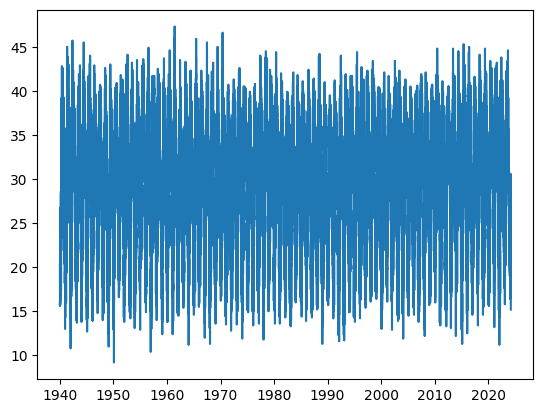

In [14]:
plt.plot(cleaned_cairo['date'], cleaned_cairo['temperature_max'])
plt.show()

>  ## As we don't have missing values in the datatset the model is ready for training ✅

## Training the model on data till 2023 📅

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_18/3158250586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_cairo['Year'] = cleaned_cairo['date'].apply(lambda x: x.year)



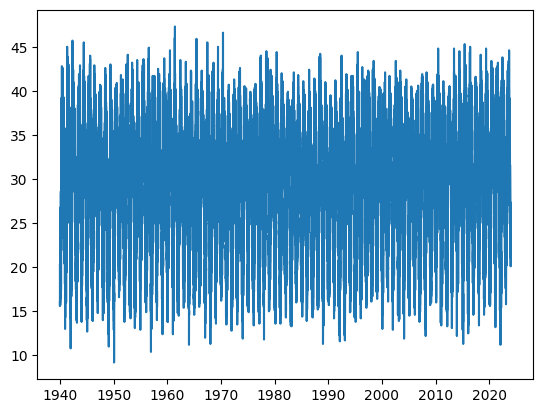

In [15]:
cleaned_cairo['Year'] = cleaned_cairo['date'].apply(lambda x: x.year)
cleaned_cairo = cleaned_cairo[cleaned_cairo['Year']<=2023]
plt.plot(cleaned_cairo['date'], cleaned_cairo['temperature_max'])
plt.show()

In [16]:
cleaned_cairo.tail()

,location_id,date,temperature_max,temperature_min,temperature_mean,apparent_temperature_mean,sunrise,sunset,rain_sum,wind_speed_max,Year
30676,0,2023-12-27,23.7,12.5,17.7,16.6,2023-12-27T06:49,2023-12-27T17:02,0.1,17.1,2023
30677,0,2023-12-28,21.1,14.2,17.0,16.4,2023-12-28T06:49,2023-12-28T17:02,8.8,19.4,2023
30678,0,2023-12-29,22.9,13.3,17.4,16.9,2023-12-29T06:49,2023-12-29T17:03,0.0,18.7,2023
30679,0,2023-12-30,22.3,12.2,16.5,16.1,2023-12-30T06:50,2023-12-30T17:04,0.0,15.4,2023
30680,0,2023-12-31,21.2,12.8,16.6,16.5,2023-12-31T06:50,2023-12-31T17:04,0.6,13.4,2023


## Now train the model on the date and temp max.

In [17]:
data = cleaned_cairo[['date', 'temperature_max']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - /tmp/ipykernel_18/3878369388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
1,1940-01-02,16.0
2,1940-01-03,15.6
3,1940-01-04,15.6
4,1940-01-05,16.4
5,1940-01-06,18.4


In [18]:
type(data)

pandas.core.frame.DataFrame

# Training the model 🦿
> #### with 2000 epochs as our dataset is large.

In [19]:
m = NeuralProphet()
cairo_model = m.fit(data, freq='D', epochs=2000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.997% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is depre

Finding best initial lr:   0%|          | 0/262 [00:00<?, ?it/s]

2024-05-04 06:50:00.165107: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 06:50:00.165233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 06:50:00.325946: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Training: 0it [00:00, ?it/s]

### Trying random new dates to see how the training went 🔍

In [20]:
dates = ['2024-04-27', '2024-04-28', '2024-05-01', '2024-05-02', '2024-05-03']
future = pd.DataFrame()
future['ds'] = pd.to_datetime(dates)
future['y'] = None
forecast = m.predict(future)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 60.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtyp

Predicting: 240it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [21]:
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2024-04-27,None,31.765537,29.810825,2.032366,-0.077656
1,2024-04-28,None,32.117859,29.810982,2.170042,0.136835
2,2024-05-01,None,32.475548,29.811455,2.573327,0.090766
3,2024-05-02,None,32.361519,29.811611,2.704855,-0.154945
4,2024-05-03,None,32.513210,29.811771,2.834988,-0.133547


# Saving the model 💾

In [22]:
with open('cairo_max_temp_model.pkl', "wb") as f:
    pickle.dump(m, f)

> ### The same steps goes for min temp training and repeating the exact same process for the other cities. 🔁
